In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# Specify the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/melanoma_cancer_dataset.zip'

# Specify the directory where you want to extract the contents
extract_dir = '/content/drive/My Drive/skin_cancer_data'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check if files are successfully unzipped
os.listdir(extract_dir)


['melanoma_cancer_dataset', '__MACOSX']

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [4]:
# Paths to train and test directories
train_dir = '/content/drive/MyDrive/skin_cancer_data/melanoma_cancer_dataset/train'
test_dir = '/content/drive/MyDrive/skin_cancer_data/melanoma_cancer_dataset/test'

In [5]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Generators
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                  batch_size=20, class_mode='binary')

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


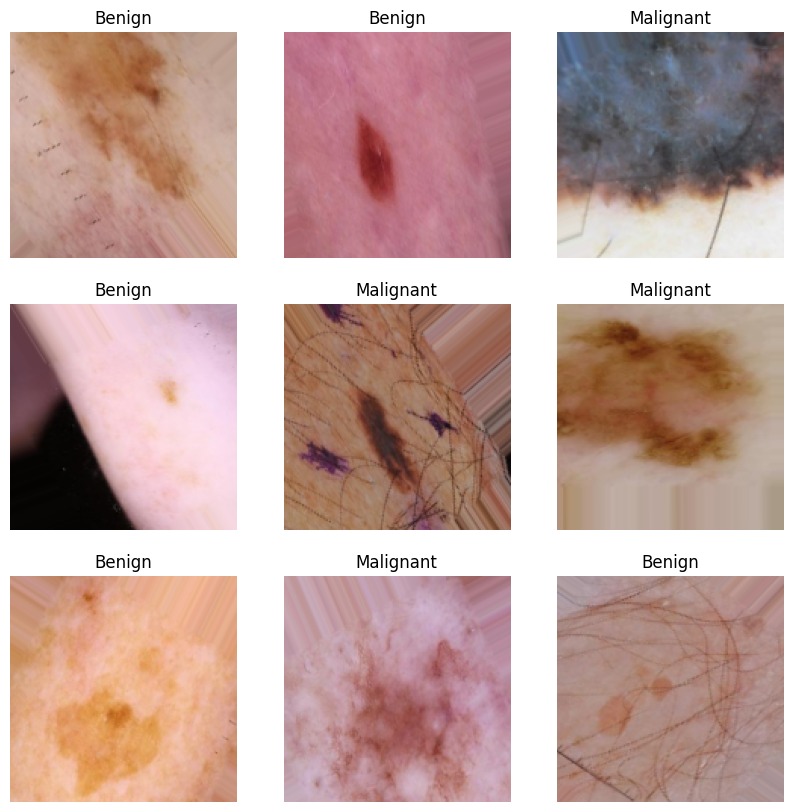

In [ ]:
# Data Exploration (e.g., visualizing some images)
for data_batch, labels_batch in train_generator:
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(data_batch[i])
        plt.title('Malignant' if labels_batch[i] == 1 else 'Benign')
        plt.axis('off')
    break
plt.show()

In [ ]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_cnn_model()

history = model.fit(train_generator, epochs=10, validation_data=test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


481/481 ━━━━━━━━━━━━━━━━━━━━ 878s 2s/step - accuracy: 0.7163 - loss: 0.6083 - val_accuracy: 0.8150 - val_loss: 0.4025
Epoch 2/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 696s 1s/step - accuracy: 0.8424 - loss: 0.3761 - val_accuracy: 0.8790 - val_loss: 0.2961
Epoch 3/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 723s 1s/step - accuracy: 0.8616 - loss: 0.3296 - val_accuracy: 0.8950 - val_loss: 0.2562
Epoch 4/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 671s 1s/step - accuracy: 0.8656 - loss: 0.3249 - val_accuracy: 0.8880 - val_loss: 0.2776
Epoch 5/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 677s 1s/step - accuracy: 0.8557 - loss: 0.3375 - val_accuracy: 0.9000 - val_loss: 0.2548
Epoch 6/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 705s 1s/step - accuracy: 0.8576 - loss: 0.3304 - val_accuracy: 0.8970 - val_loss: 0.2669
Epoch 7/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 786s 2s/step - accuracy: 0.8698 - loss: 0.3114 - val_accuracy: 0.8990 - val_loss: 0.2483
Epoch 8/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 785s 2s/step - accuracy: 0.8672 - loss: 0.3071 - val_accuracy: 0.902

50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 366ms/step
              precision    recall  f1-score   support

      Benign       0.49      0.50      0.50       500
   Malignant       0.49      0.49      0.49       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



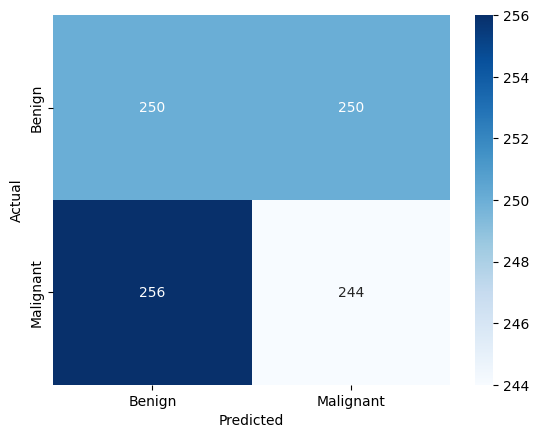

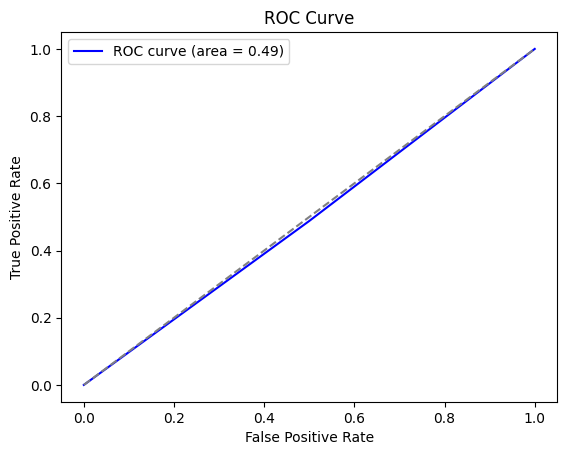

In [ ]:
# Classification Report
test_generator.reset()
preds = model.predict(test_generator, verbose=1)
preds = np.where(preds > 0.5, 1, 0)
print(classification_report(test_generator.classes, preds, target_names=['Benign', 'Malignant']))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(test_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Save the original CNN model
model.save('/content/drive/My Drive/cnn_skin_cancer_model.h5')

In [ ]:
def create_deeper_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
deeper_cnn_model = create_deeper_cnn_model()

deeper_cnn_history = deeper_cnn_model.fit(train_generator, epochs=10, validation_data=test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 725s 1s/step - accuracy: 0.7083 - loss: 0.5632 - val_accuracy: 0.8580 - val_loss: 0.3608
Epoch 2/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 727s 1s/step - accuracy: 0.8202 - loss: 0.4231 - val_accuracy: 0.8810 - val_loss: 0.2918
Epoch 3/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 729s 2s/step - accuracy: 0.8406 - loss: 0.3706 - val_accuracy: 0.8860 - val_loss: 0.2694
Epoch 4/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 704s 1s/step - accuracy: 0.8461 - loss: 0.3597 - val_accuracy: 0.8840 - val_loss: 0.2752
Epoch 5/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 748s 1s/step - accuracy: 0.8476 - loss: 0.3466 - val_accuracy: 0.8880 - val_loss: 0.2742
Epoch 6/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 722s 1s/step - accuracy: 0.8578 - loss: 0.3284 - val_accuracy: 0.8260 - val_loss: 0.4517
Epoch 7/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 732s 1s/step - accuracy: 0.8662 - loss: 0.3378 - val_accuracy: 0.8930 - val_loss: 0.2467
Epoch 8/10
481/481 ━━━━━━━━━━━━━━━━━━━━ 714s 1s/step - accuracy: 0.8750 - loss: 0.2974 - val_accu

50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 438ms/step
Deeper CNN Model Classification Report:
              precision    recall  f1-score   support

      Benign       0.50      0.50      0.50       500
   Malignant       0.50      0.49      0.49       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



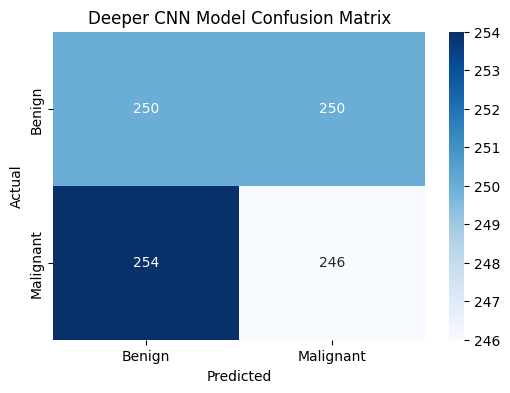

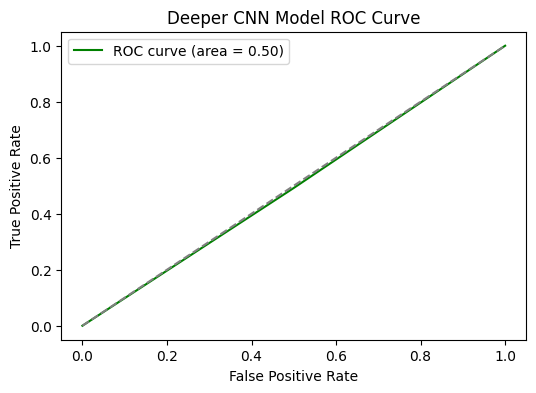

In [ ]:
# Predictions and Classification Report
test_generator.reset()
deeper_cnn_preds = deeper_cnn_model.predict(test_generator, verbose=1)
deeper_cnn_preds = np.where(deeper_cnn_preds > 0.5, 1, 0)
print("Deeper CNN Model Classification Report:")
print(classification_report(test_generator.classes, deeper_cnn_preds, target_names=['Benign', 'Malignant']))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, deeper_cnn_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Deeper CNN Model Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(test_generator.classes, deeper_cnn_preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deeper CNN Model ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Save the deeper CNN model
deeper_cnn_model.save('/content/drive/My Drive/deeper_cnn_skin_cancer_model.h5')

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils import class_weight

In [45]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='binary'
)

# Calculate class weights to handle imbalance
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
# Load ResNet50 with pre-trained ImageNet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last few layers of the base model
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, kernel_regularizer=l2(0.01), name="dense_1")(x)
x = BatchNormalization(name="batch_norm")(x)
x = ReLU(name="relu")(x)
x = Dropout(0.5, name="dropout")(x)
predictions = Dense(1, activation='sigmoid', name="output")(x)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a reduced learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 4,990,977 (19.04 MB)

 Non-trainable params: 19,122,560 (72.95 MB)

In [39]:
# Set training parameters
epochs = 10  # Increase the number of epochs if necessary

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    class_weight=class_weights  # Apply class weights
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


301/301 ━━━━━━━━━━━━━━━━━━━━ 205s 480ms/step - accuracy: 0.7446 - loss: 5.0136 - val_accuracy: 0.5030 - val_loss: 5.1644
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 139s 449ms/step - accuracy: 0.8340 - loss: 4.5883 - val_accuracy: 0.8660 - val_loss: 4.3561
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 138s 449ms/step - accuracy: 0.8403 - loss: 4.2998 - val_accuracy: 0.8310 - val_loss: 4.1430
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 138s 448ms/step - accuracy: 0.8479 - loss: 4.0403 - val_accuracy: 0.7370 - val_loss: 4.2268
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 138s 448ms/step - accuracy: 0.8460 - loss: 3.7943 - val_accuracy: 0.6980 - val_loss: 4.1485
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 138s 448ms/step - accuracy: 0.8485 - loss: 3.5864 - val_accuracy: 0.8860 - val_loss: 3.3489
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 138s 448ms/step - accuracy: 0.8480 - loss: 3.3797 - val_accuracy: 0.8660 - val_loss: 3.1721
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 138s 448ms/step - accuracy: 0.8542 - loss: 3.17

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8974 - loss: 2.6328
Test accuracy: 0.8930


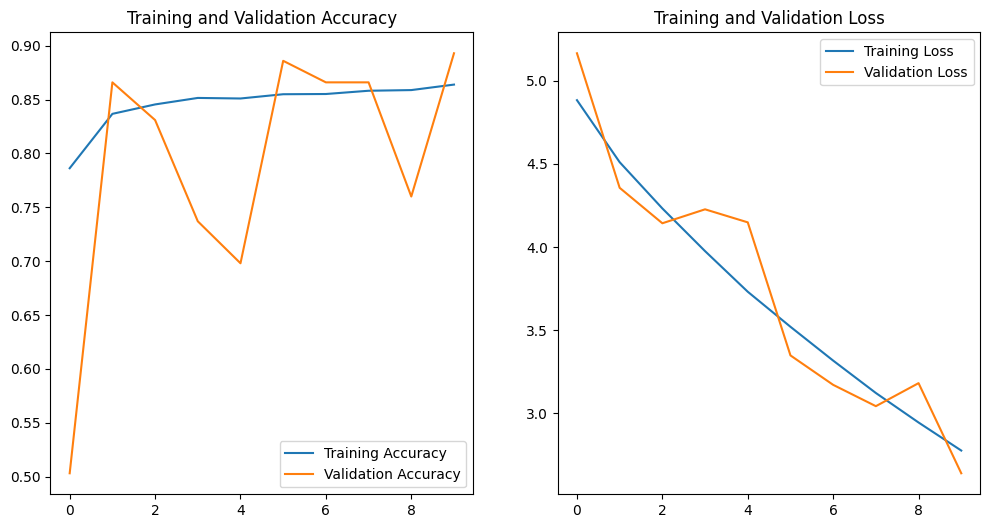

In [40]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

 1/32 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step
Classification Report:
              precision    recall  f1-score   support

      benign       0.50      0.52      0.51       500
   malignant       0.50      0.48      0.49       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



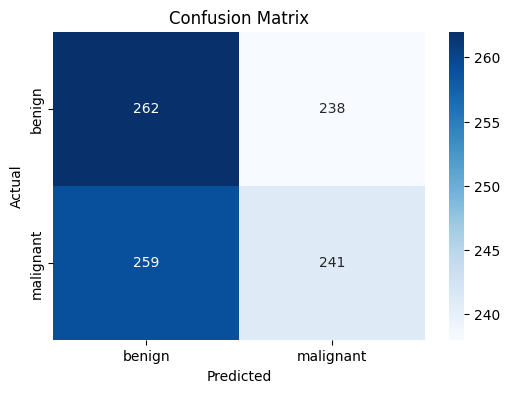

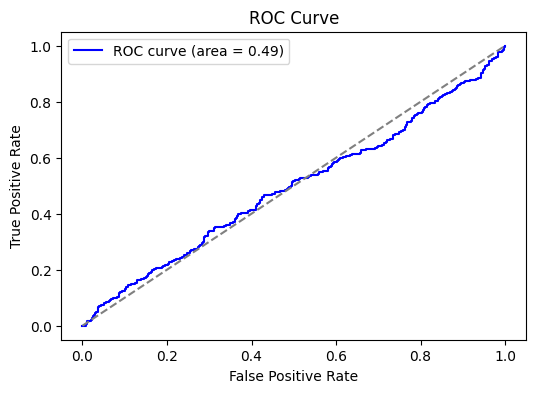

In [46]:
# Generate predictions
predictions = model.predict(test_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)

# True classes
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


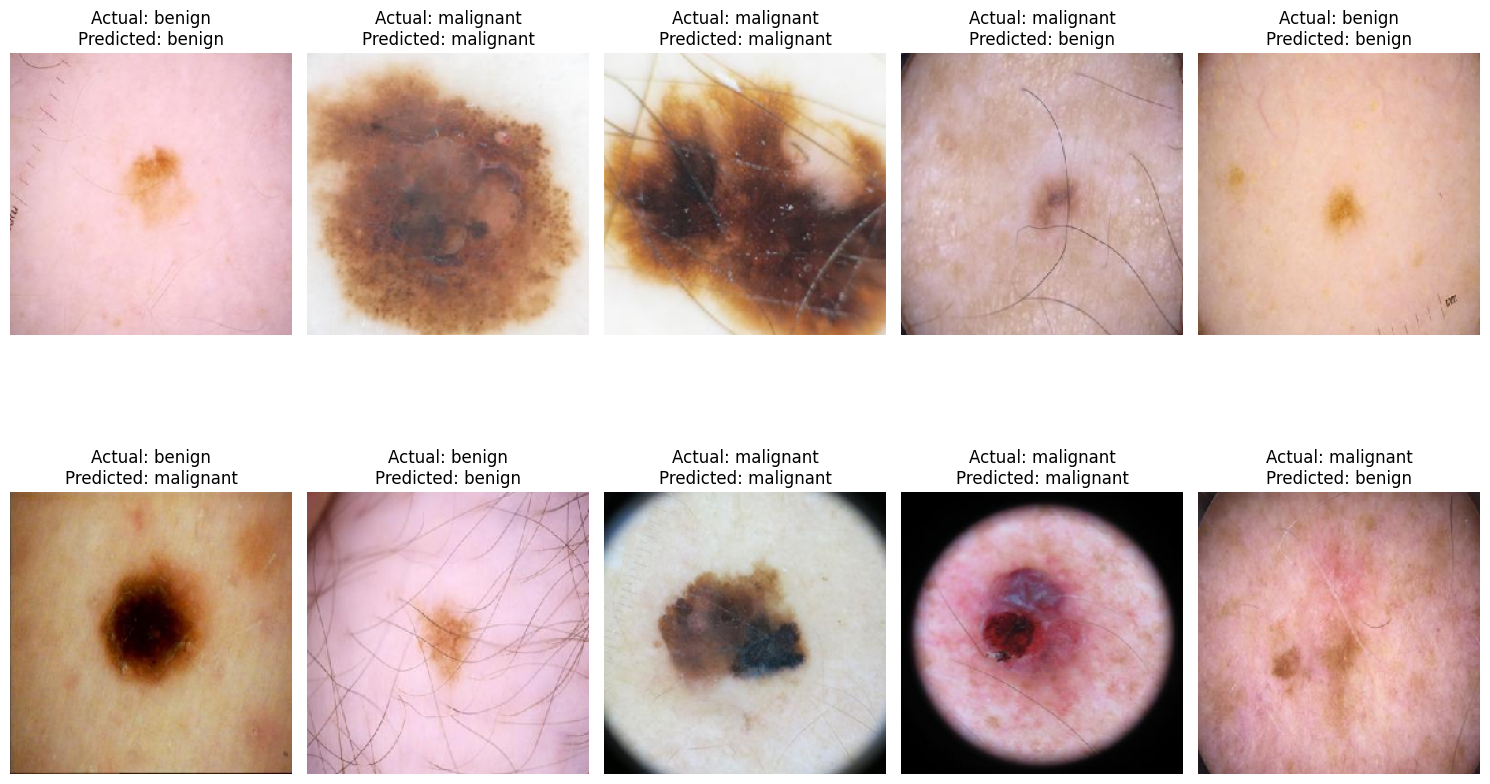

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Get a batch of images and labels from the test generator
test_generator.reset()
x_test, y_test = next(test_generator)

# Make predictions on the batch
y_pred_probs = model.predict(x_test)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Flatten y_test and y_pred if they are not 1D
y_test = y_test.ravel()
y_pred = y_pred.ravel()

# Map class indices to class names
class_labels = {v: k for k, v in test_generator.class_indices.items()}

# Plotting the images with their actual and predicted labels
plt.figure(figsize=(15, 10))

for i in range(10):  # Visualize first 10 predictions, adjust the range as needed
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual: {class_labels[y_test[i]]}\nPredicted: {class_labels[y_pred[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [48]:
# Save the original CNN model
model.save('/content/drive/My Drive/ResNet_skin_cancer_model.h5')